**Цель**:

Изучить применение моделей кластеризации
Описание задания:

В домашнем задании нужно сократить число цветов в палитре изображения. [Картинку](https://www.firestock.ru/wp-content/uploads/2018/03/YArkaya-klumba-Bright-flower-bed-6000x4000-700x466.jpg) для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

**Этапы работы**:

Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

a) Для отображения картинки воспользуйтесь вспомогательной функцией:

import matplotlib.pyplot as plt

import cv2

import skimage

def draw_picture(image, title, bgr=False):

b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB

new_image = cv2.merge([r, g, b])

plt.figure(figsize=(7, 5))

plt.axis(‘off’)

plt.imshow(new_image)

plt.title(title)

plt.show()

b) Для загрузки картинки можно использовать код:

img = cv.imread(path)

**Реализуйте три модели кластеризации:**

a) [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Рассмотрите число кластеров K = 2, 5, 10, 20.

b) [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

c) [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Рассмотрите число кластеров K = 2, 5, 10, 20.

Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
Сформулируйте выводы по проделанной работе.

a) Какая модель показала лучший результат?

Для получения зачета по этому домашнему заданию минимально должно быть реализовано обучение трех моделей с одним и тем же значением кластеров, где такой параметр присутствует.

**Результат:**

Получены знания по применению моделей кластеризации.

# Preparation

In [6]:
import matplotlib.pyplot as plt
import cv2 as cv
import skimage
import numpy as np
import pandas as pd

In [7]:
def draw_picture(image, title, bgr=False):
  b, g, r = cv.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
  new_image = cv.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

In [40]:
img = cv.imread('/content/YArkaya-klumba-Bright-flower-bed-6000x4000-700x466.jpg')

In [9]:
#img = cv.imread('https://www.firestock.ru/wp-content/uploads/2018/03/YArkaya-klumba-Bright-flower-bed-6000x4000-700x466.jpg')

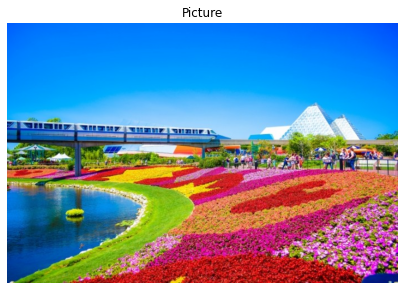

In [10]:
draw_picture(img, 'Picture')

In [11]:
type(img)

numpy.ndarray

In [12]:
from sklearn.cluster import KMeans

# KMeans

In [13]:
K = [1, 5, 15, 25]
EPS = [0.1, 1, 2, 3]

In [ ]:
pic_box = plt.figure(figsize=(12,8))
vectorized = np.float32(image.reshape((-1,3)))
criteria = (cv.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts=10

for i, k in enumerate(K):
    ret,label,center = cv.kmeans(data=vectorized, K=k, bestLabels=None, criteria=criteria, 
                                attempts=attempts, flags=cv.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    result_image = center[label.flatten()].reshape((image.shape))
    result_image = cv.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    pic_box.add_subplot(2,2,i+1)
    plt.imshow(result_image)
    plt.title(f'KMeans {k}')
    plt.axis('off')
    

https://www.machinelearningmastery.ru/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3/

In [15]:
from skimage.metrics import structural_similarity as ssim

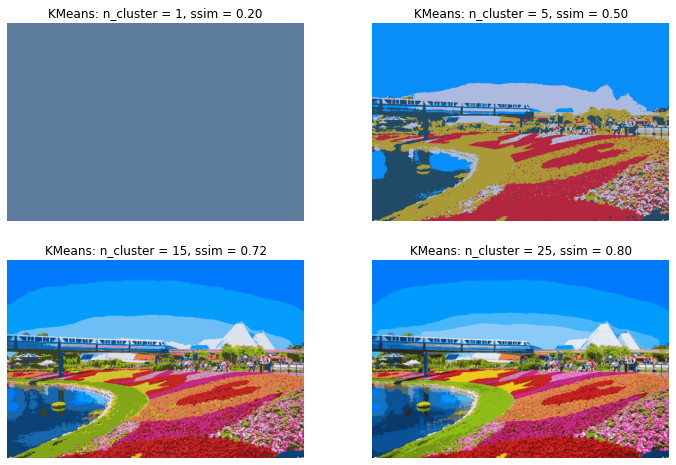

In [17]:
pic_box = plt.figure(figsize=(12,8))
vectorized = np.float32(img.reshape((-1,3)))
for i, k in enumerate(K):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(vectorized)
    result = np.uint8(kmeans.cluster_centers_)[kmeans.labels_]
    result_img = result.reshape(img.shape)
    result_img = cv.cvtColor(result_img, cv.COLOR_BGR2RGB)
    ssim_value = ssim(cv.cvtColor(img, cv.COLOR_BGR2RGB),
                      result_img, 
                      data_range=result_img.max() - result_img.min(), 
                      multichannel=True)
    pic_box.add_subplot(2,2,i+1)
    plt.imshow(result_img)
    plt.title(f'KMeans: n_cluster = {k}, ssim = {ssim_value:.2f}')
    plt.axis('off')

# DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

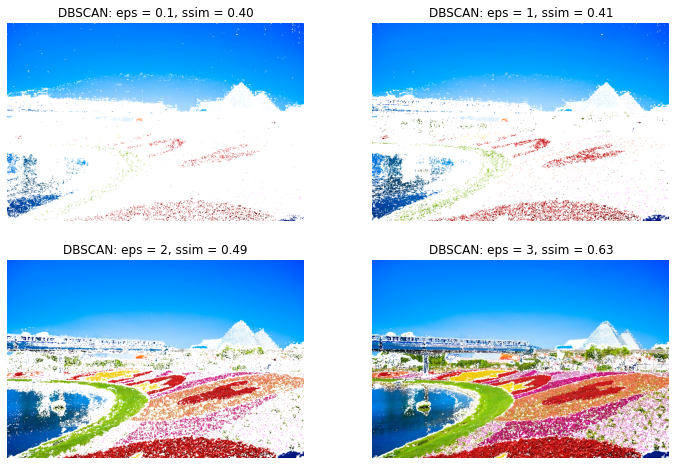

In [19]:
pic_box = plt.figure(figsize=(12,8))
vectorized = np.float32(img.reshape((-1,3)))

for i, eps in enumerate(EPS):
    dbscan = DBSCAN(eps=eps, min_samples=5).fit(vectorized)
    result = []
    for cnt, j in enumerate(dbscan.labels_):
        if j == -1:
            result.append([255, 255, 255])
        else:
            result.append(vectorized[cnt])
    result = np.uint8(np.array(result))

    result_img = result.reshape(img.shape)
    result_img = cv.cvtColor(result_img, cv.COLOR_BGR2RGB)
    ssim_value = ssim(cv.cvtColor(img, cv.COLOR_BGR2RGB),
                    result_img, 
                    data_range=result_img.max() - result_img.min(), 
                    multichannel=True)
    pic_box.add_subplot(2,2,i+1)
    plt.imshow(result_img)
    plt.title(f'DBSCAN: eps = {eps}, ssim = {ssim_value:.2f}')
    plt.axis('off')

# AgglomerativeClustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
img = cv.resize(img, (128, 128))

In [42]:
def mean_color(labels: np.array, colors: np.array) -> dict:
    mean_colors = {}
    for label in np.unique(labels):
        mean_colors[label] = [round(i.mean()) for i in colors[labels==label].T]
    return mean_colors

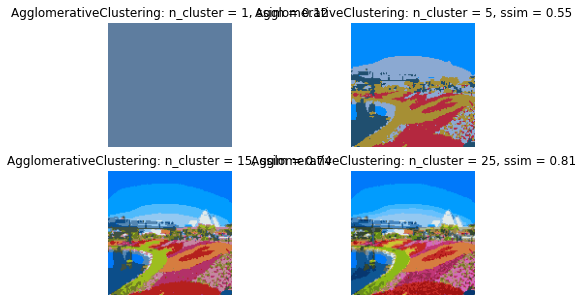

In [45]:
pic_box = plt.figure(figsize=(8,5))
vectorized = np.float16(img.reshape((-1,3)))

for i, k in enumerate(K):
    agg_clust = AgglomerativeClustering(n_clusters=k).fit(vectorized)
    clustering_color = mean_color(agg_clust.labels_, vectorized)

    result = []
    for label in agg_clust.labels_:
        result.append(clustering_color[label])
    result = np.uint8(np.array(result))

    result_img = result.reshape(img.shape)
    result_img = cv.cvtColor(result_img, cv.COLOR_BGR2RGB)
    ssim_value = ssim(cv.cvtColor(img, cv.COLOR_BGR2RGB),
                result_img, 
                data_range=result_img.max() - result_img.min(), 
                multichannel=True)
    pic_box.add_subplot(2,2,i+1)
    plt.imshow(result_img)
    plt.title(f'AgglomerativeClustering: n_cluster = {k}, ssim = {ssim_value:.2f}')
    plt.axis('off')

# Summary

Понял, что у коллаба очень мало оперативки и не вполне понял зачем кластеризацию на картинках делали((